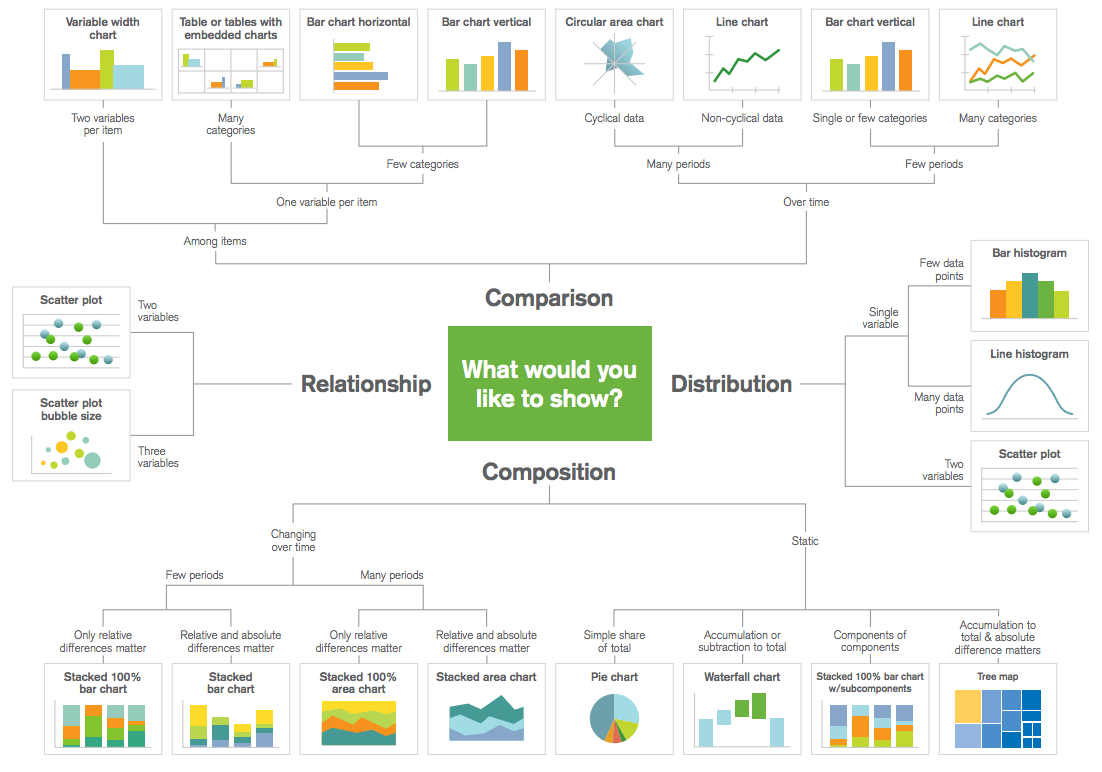

In python there is a enormous amount of data visualisation libraries.
You can find a library to basically any sort of plot
For that reason there is also a lot of redundancy. So, the best strategy is to look for a package that support the types of plots you want to do and that has the coding syntax the pleases you most.

Here are a list of some of the most famous charting libraries in python

1- ***matplotlib*** Despite being over a decade old, it's still the most widely used library for plotting in the Python community.

2- ***Seaborn*** harnesses the power of matplotlib to create beautiful charts in a few lines of code.

3- ***ggtplot*** ggplot is based on ggplot2, an R plotting system, and concepts from The Grammar of Graphics.

4- ***Bokeh*** ts strength lies in the ability to create interactive, web-ready plots, which can be easily output as JSON objects, HTML documents, or interactive web applications.

5- ***pygal*** offers interactive plots that can be embedded in the web browser.

6- ***Plotly's*** forte is making interactive plots, but it offers some charts you won't find in most libraries

### We will start by exploring seaborn
Note most of the data here will be toy data created from numpy arrays as they are better suited to some examples. However any data can be used on those plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")



# Working on relational data

In [3]:
# Load the tips dataset as a df
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


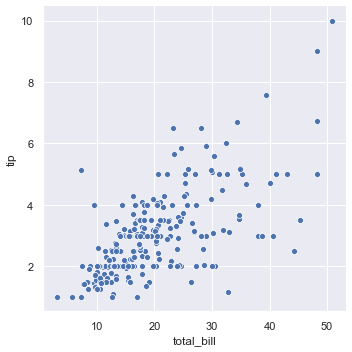

In [4]:
# Make a scatter plot to show relationship between tips and total bill
sns.relplot(x="total_bill", y="tip", data=tips)
plt.show()

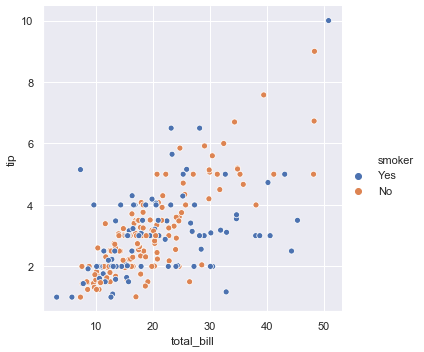

In [5]:
# With seaborn we can use colors to categorize the points
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
plt.show()

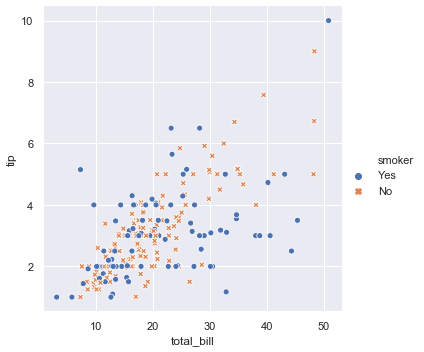

In [6]:
# You can also style your points
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)
plt.show()

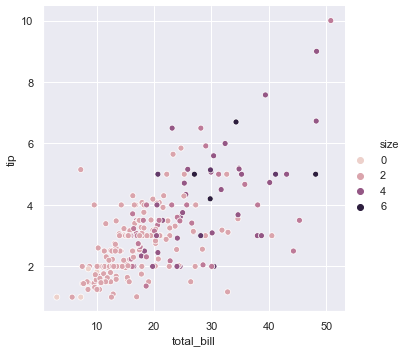

In [7]:
# it is very cool that if a category for hue is numeric it gets converted in a color paletter
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
plt.show()

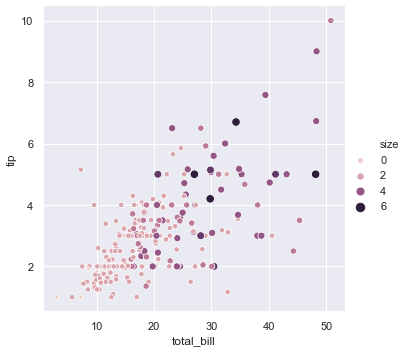

In [8]:
# You can also vary the size of the points with the attribute size
sns.relplot(x="total_bill", y="tip", hue="size", size="size", data=tips)
plt.show()

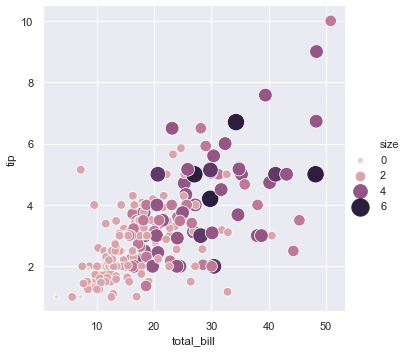

In [9]:
# You can customize the points size with 'sizes'
sns.relplot(x="total_bill", y="tip", hue="size", size="size", 
            sizes=(20, 300), data=tips)
plt.show()

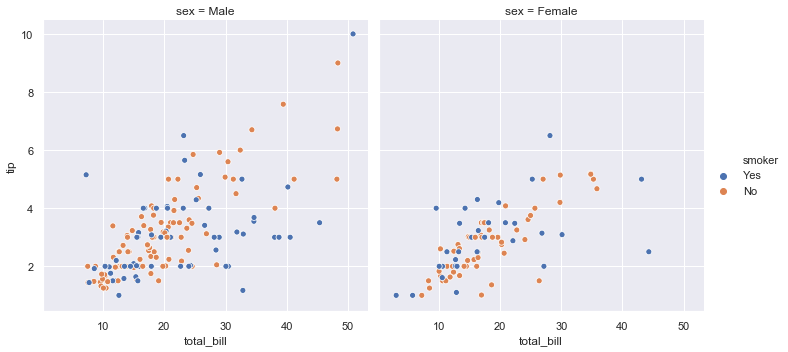

In [10]:
# You can show multiple relationships in the same graph as well
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="sex", data=tips)
plt.show()

### Representing uncertainty 
Sometimes your data points are not unique, but has multiple measurements. In this case it would be interesting represent the uncertainty of you data.

In [8]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


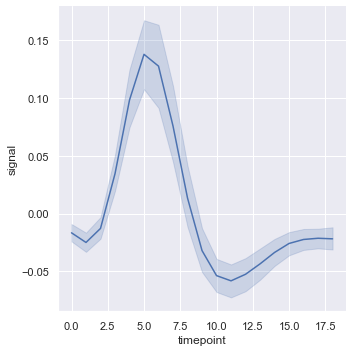

In [9]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
plt.show()

The confidence intervals are computed using bootstrapping

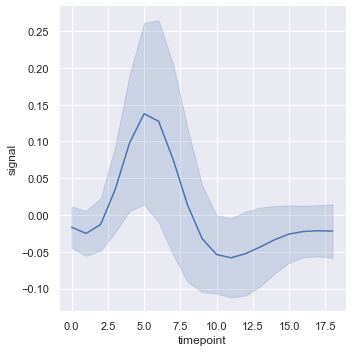

In [10]:
# Another good option, especially with larger data, 
# is to represent the spread of the distribution at 
# each timepoint by plotting the standard deviation instead of a confidence interval

sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)
plt.show()

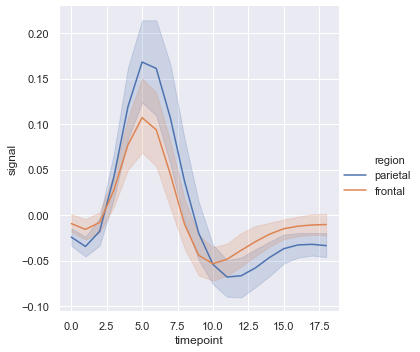

In [11]:
# You can basically style the line plots with categories as you do with scatterplots
sns.relplot(x="timepoint", y="signal", hue="region", kind="line", data=fmri)
plt.show()

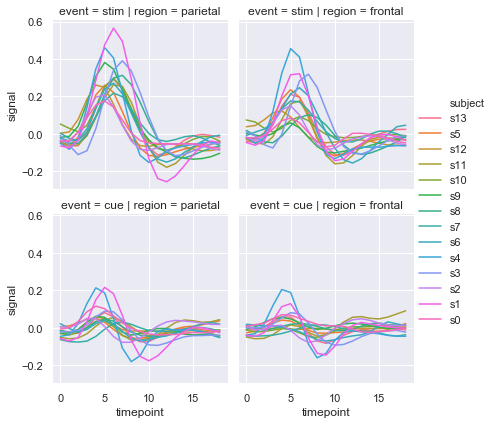

In [12]:
#You can also show the influence two variables this way: one by faceting on 
# the columns and one by faceting on the rows.

sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

plt.show()

# Working on Categorical Data
Here are the categorical plots of seaborn
Categorical scatterplots:

    stripplot() (with kind="strip"; the default)
    swarmplot() (with kind="swarm")

Categorical distribution plots:

    boxplot() (with kind="box")
    violinplot() (with kind="violin")
    boxenplot() (with kind="boxen")

Categorical estimate plots:

    pointplot() (with kind="point")
    barplot() (with kind="bar")
    countplot() (with kind="count")


##### The main way of using a categoric plot is to call the catplot() method and specify the kind to it. The default tipy (if you don't specify a 'kind' is the stripplot )

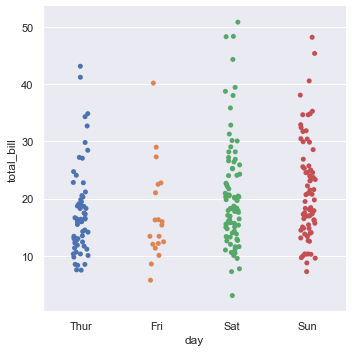

In [13]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)
plt.show()

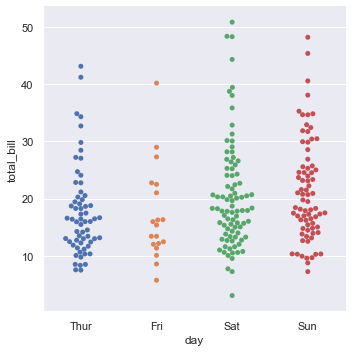

In [14]:
# If you find the point overlapping annoying you can use swarmplot
sns.catplot(x="day", y="total_bill", kind='swarm', data=tips)
plt.show()

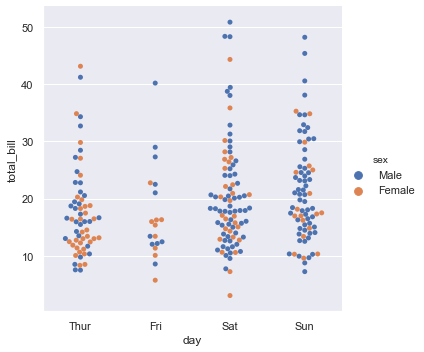

In [15]:
# As before the hue sematics is available
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)
plt.show()

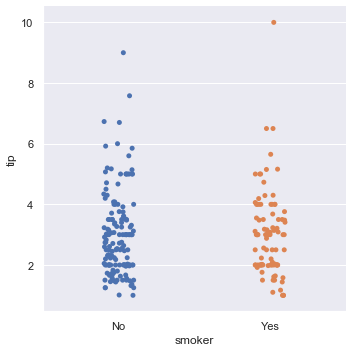

In [16]:
# The other option for chosing a default ordering is to take the levels of the category as they appear in the dataset. 
# The ordering can also be controlled on a plot-specific basis using the order parameter.

sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)
plt.show()

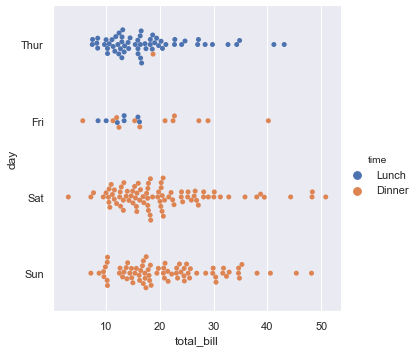

In [17]:
# Some times it is useful to put the categorical values in the Y axis
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)
plt.show()

#### Observing distributions within  categories

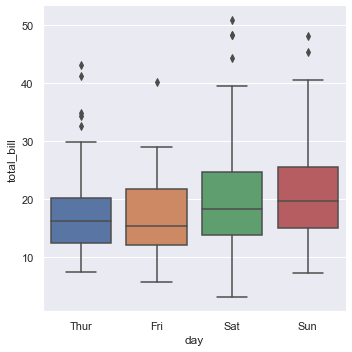

In [18]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)
plt.show()

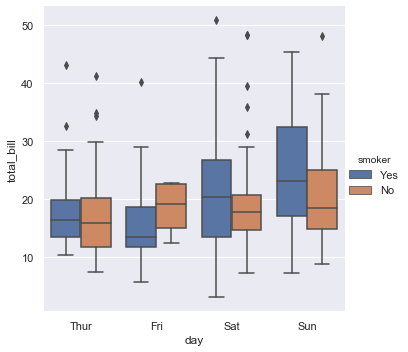

In [19]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)
plt.show()

In [40]:
#A different approach is a violinplot(), 
# which combines a boxplot with the kernel density estimation procedure 

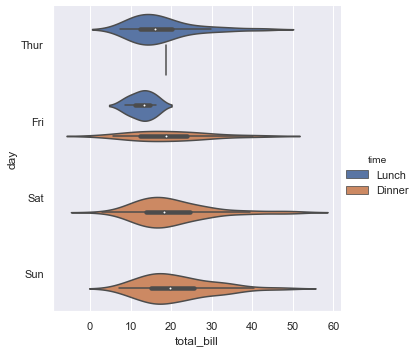

In [20]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)
plt.show()

# Titanic

In [21]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Showing multiple relationships with facets

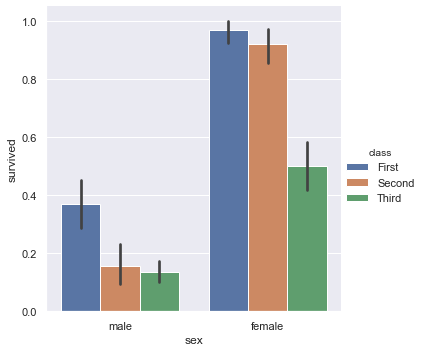

In [22]:
# A simple estimation of surviving catorized by $$$ and gender
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

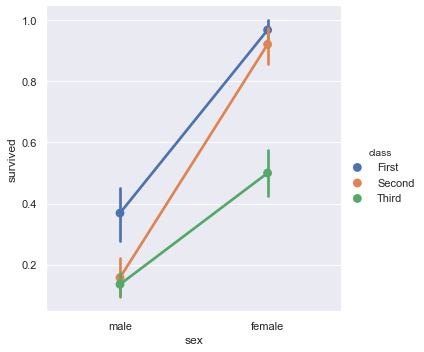

In [23]:
# You can also plot how a category influences the relationship of variables
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)
plt.show()

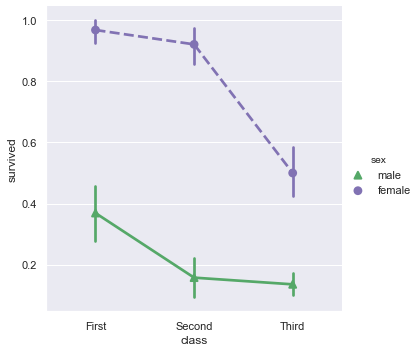

In [24]:
# Customization
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)
plt.show()

### Showing multiple relationships with facets

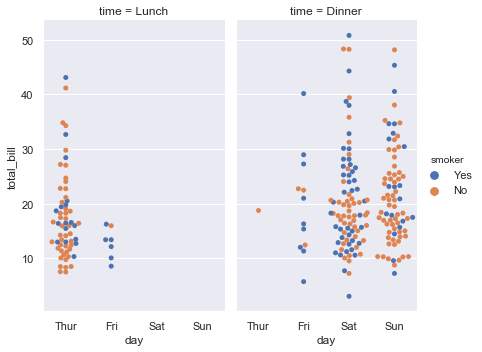

In [25]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)
plt.show()

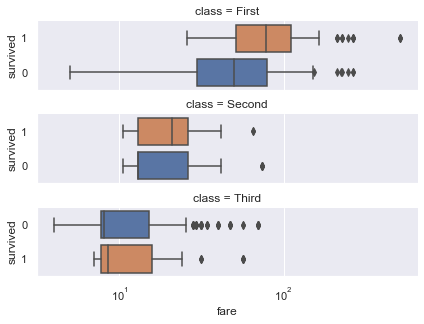

In [26]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")
plt.show()

## Building structured multi-plot grids
You can use the class **FacetGrid** explicitly to control  how to present your plots.

A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

The class is used by initializing a FacetGrid object with a dataframe and the names of the variables that will form the row, column, or hue dimensions of the grid.

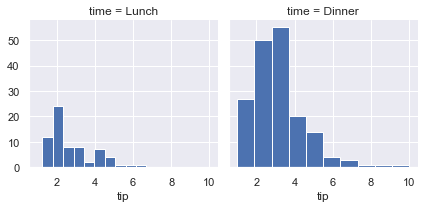

In [27]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip")
plt.show()

/Users/dmorais/anaconda/envs/dsp19/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


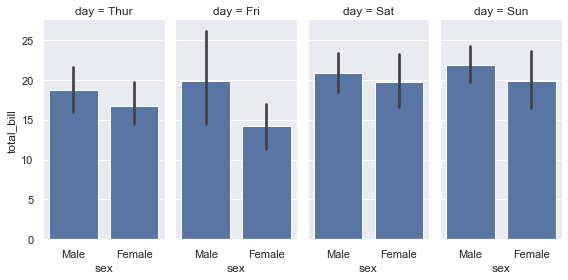

In [28]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill")
plt.show()

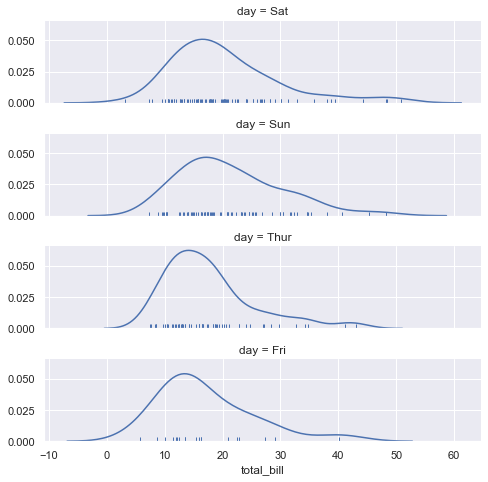

In [31]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True)
plt.show()

In [29]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


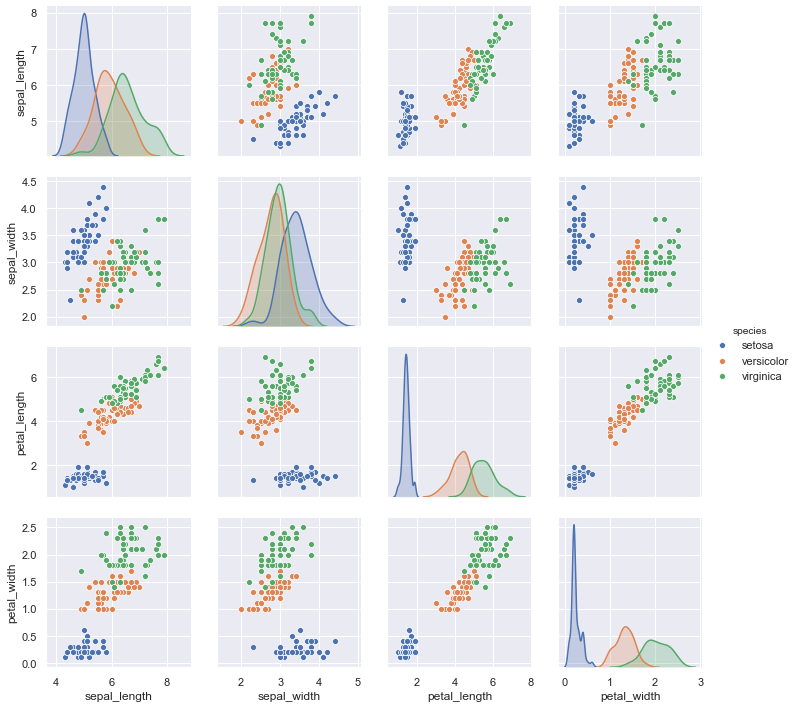

In [30]:
sns.pairplot(iris, hue="species", height=2.5)
plt.show()

## Controlling figure aesthetics

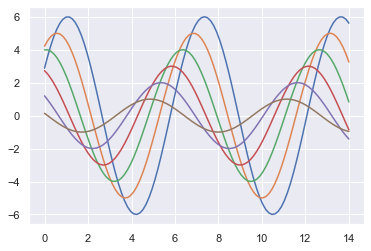

In [33]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()
plt.show()

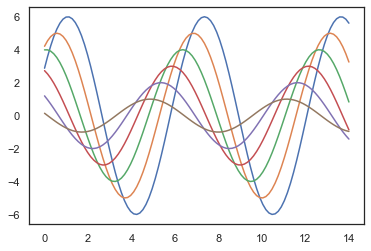

In [34]:
# change syle
sns.set_style("white")
sinplot()
plt.show()

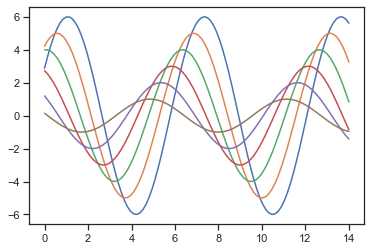

In [35]:
# add ticks
sns.set_style("ticks")
sinplot()
plt.show()

In [36]:
# The sns.axes_styles() allows you to modify just about anything in your plot
{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

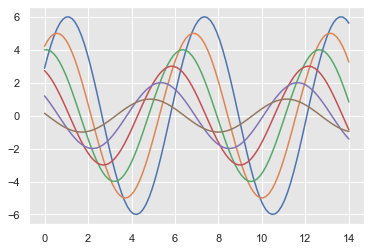

In [37]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()
plt.show()

## Scaling plot elements

A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let’s reset the default parameters by calling set()

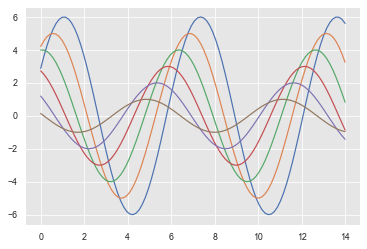

In [38]:
sns.set_context("paper")
sinplot()
plt.show()

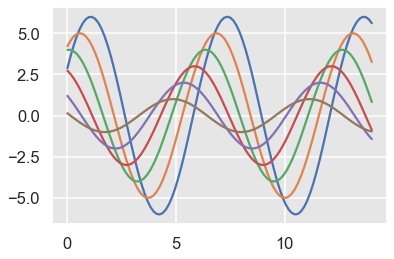

In [39]:
sns.set_context("talk")
sinplot()
plt.show()

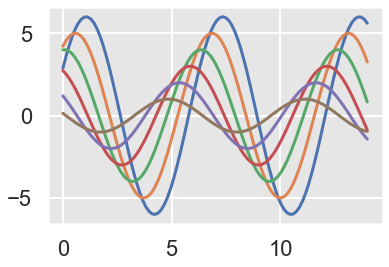

In [40]:
sns.set_context("poster")
sinplot()
plt.show()

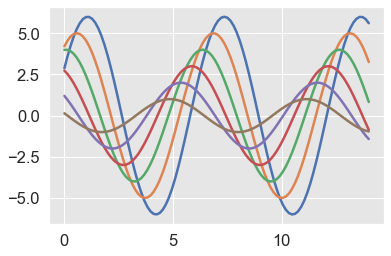

In [41]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()
